<a href="https://colab.research.google.com/github/rahimshavil/mini-projects-in-colab/blob/main/placementdatavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. RAW MESSY DATA ---
   Student_ID          CGPA  Backlogs  Technical_Score Package_LPA
0         101           8.5       0.0               85     4.5 LPA
1         102           9.2       0.0               95    12.0 LPA
2         103           7.5       2.0               60  Not Placed
3         104       Unknown       0.0               70     3.5 LPA
4         105           6.8       4.0               40  Not Placed
5         106           8.9       NaN               88         8.0
6         107           7.2       1.0               65     3.0 LPA
7         108  9.5 (Topper)       0.0               98     1500000


--- 2. DATA PREPROCESSING (CLEANING) ---


--- STARTING CLEANUP ---
Fixed CGPA. Filled missing values with Mean: (8.02)
Fixed Backlogs. Assumed NaN means 0 backlogs.
Fixed Packages. Standardized everything to Lakhs Per Annum (LPA).


--- 3. FINAL CLEAN DATA ---
   Student_ID      CGPA  Backlogs  Technical_Score  Package_LPA  \
0         101  8.500000         0       

/tmp/ipython-input-1652235108.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Backlogs', y='CGPA', data=df, palette='Set2')
/tmp/ipython-input-1652235108.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Student_ID', y='Package_LPA', data=placed_df, palette='viridis')


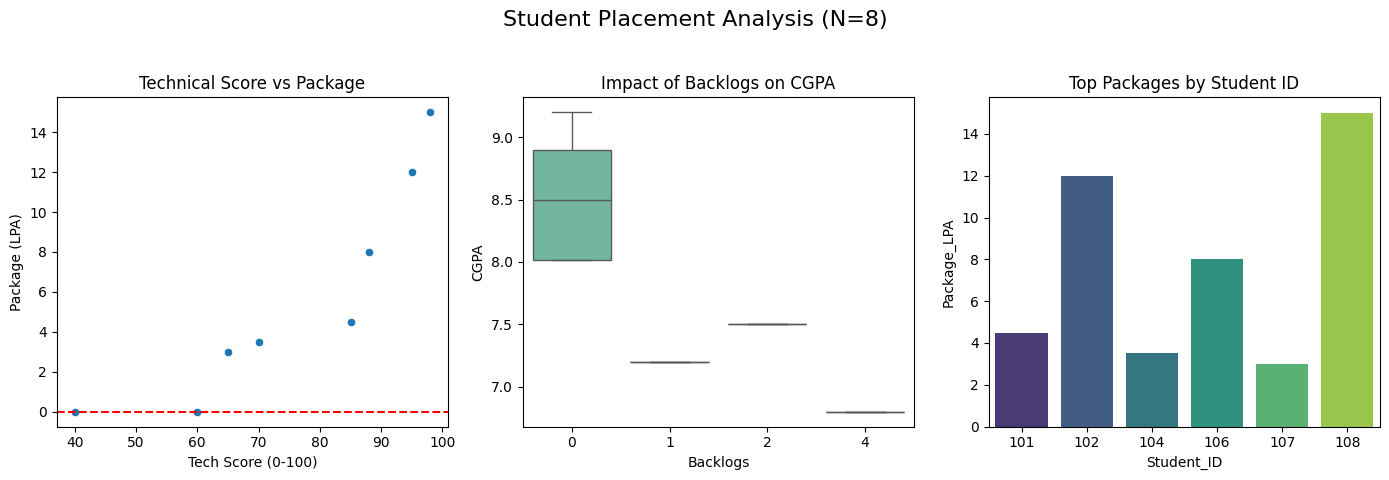

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- SCENARIO ---
# You are the Placement Coordinator. You received a messy Excel file
# from the department clerk. You need to clean it to present a report
# to the Principal about this year's performance.

# --- 1. CREATING THE MESSY DATASET ---
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    # Messy values: 'Unknown', '9.5 (Topper)', 'NaN'
    'CGPA': ['8.5', '9.2', '7.5', 'Unknown', '6.8', '8.9', '7.2', '9.5 (Topper)'],
    # Messy: NaN likely means 0 backlogs
    'Backlogs': [0, 0, 2, 0, 4, np.nan, 1, 0],
    'Technical_Score': [85, 95, 60, 70, 40, 88, 65, 98],
    # Messy: '4.5 LPA', 'Not Placed', '1500000' (Raw Amount)
    'Package_LPA': ['4.5 LPA', '12.0 LPA', 'Not Placed', '3.5 LPA', 'Not Placed', '8.0', '3.0 LPA', '1500000']
}

df = pd.DataFrame(data)

print("--- 1. RAW MESSY DATA ---")
print(df)


# --------------------------------------------------
print("\n\n--- 2. DATA PREPROCESSING (CLEANING) ---")
print("\n\n--- STARTING CLEANUP ---")

# --- A. Clean 'CGPA' column ---
# Problem: 'Unknown', '9.5 (Topper)', turn errors to NaN, then fill.
# Solution: Force convert to numeric, turning text errors to NaN, then fill with Mean.
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')  # 'Unknown' & '9.5 (Topper)' become NaN
mean_cgpa = df['CGPA'].mean()
df['CGPA'] = df['CGPA'].fillna(mean_cgpa)
print(f"Fixed CGPA. Filled missing values with Mean: ({mean_cgpa:.2f})")

# --- B. Clean 'Backlogs' column ---
# Problem: NaN exists.
# Domain logic: If backlog is empty (NaN), it usually means the student has None (0).
df['Backlogs'] = df['Backlogs'].fillna(0)
df['Backlogs'] = df['Backlogs'].astype(int) # Convert to integer type
print("Fixed Backlogs. Assumed NaN means 0 backlogs.")


# --- C. Clean 'Package_LPA' (The tricky part) ---
# Problem: '4.5 LPA', 'Not Placed', '1500000' (Raw Amount)
def clean_package(value):
    """Converts various package formats to a clean float in LPA."""
    value = str(value).lower().strip()

    # 1. Handle 'Not Placed' / 'Unplaced' cases
    if "not placed" in value:
        return 0.0

    # 2. Handle 'LPA' cases (e.g., '4.5 lpa')
    if "lpa" in value:
        # Remove 'lpa' and convert to float
        return float(value.replace('lpa', '').strip())

    # 3. Handle raw numbers (e.g., '8.0' or '1500000')
    try:
        val = float(value)
        # ASSUMPTION: If value > 50, it's in Rupees (raw amount), not Lakhs per Annum.
        # This is based on typical placement package values.
        if val > 50:
            return val / 100000  # Convert Raw Rupees to Lakhs (1 Lakh = 100,000)
        return val # Already in LPA (e.g., 8.0)
    except ValueError:
        # If conversion fails (e.g., some unexpected text), treat as 0.0
        return 0.0

df['Package_LPA'] = df['Package_LPA'].apply(clean_package)
print("Fixed Packages. Standardized everything to Lakhs Per Annum (LPA).")

# Add a categorical column for visualization (e.g., for filtering)
df['Placement_Status'] = df['Package_LPA'].apply(lambda x: 'Placed' if x > 0 else 'Unplaced')

print("\n\n--- 3. FINAL CLEAN DATA ---")
print(df)


# --------------------------------------------------
print("\n\n--- 4. EDA VISUALIZATION ---")

plt.figure(figsize=(14, 5))
plt.suptitle(f"Student Placement Analysis (N={len(df)})", fontsize=16)

# --- Plot 1: Technical Score vs Package ---
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x='Technical_Score', y='Package_LPA', data=df)
plt.title('Technical Score vs Package')
plt.xlabel('Tech Score (0-100)')
plt.ylabel('Package (LPA)')
# Add a zero line for packages to emphasize unplaced students
plt.axhline(y=0, color='red', linestyle='--')


# --- Plot 2: CGPA vs Backlogs (Do backlogs affect grades?) ---
plt.subplot(1, 3, 2)
# Using a boxplot to show the distribution of CGPA for different backlog counts
sns.boxplot(x='Backlogs', y='CGPA', data=df, palette='Set2')
plt.title('Impact of Backlogs on CGPA')


# --- Plot 3: Who got the highest packages? ---
plt.subplot(1, 3, 3)
# Filter only placed students for this chart
placed_df = df[df['Package_LPA'] > 0]
# Use barplot to show individual student performance
sns.barplot(x='Student_ID', y='Package_LPA', data=placed_df, palette='viridis')
plt.title('Top Packages by Student ID')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for the suptitle
plt.show()

--- 1. RAW MESSY DATA ---
   Student_ID          CGPA  Backlogs  Technical_Score Package_LPA
0         101           8.5       0.0               85     4.5 LPA
1         102           9.2       0.0               95    12.0 LPA
2         103           7.5       2.0               60  Not Placed
3         104       Unknown       0.0               70     3.5 LPA
4         105           6.8       4.0               40  Not Placed
5         106           8.9       NaN               88         8.0
6         107           7.2       1.0               65     3.0 LPA
7         108  9.5 (Topper)       0.0               98     1500000


--- 2. DATA PREPROCESSING (CLEANING) ---


--- STARTING CLEANUP ---
Fixed CGPA. Filled missing values with Mean: (8.02)
Fixed Backlogs. Assumed NaN means 0 backlogs.
Fixed Packages. Standardized everything to Lakhs Per Annum (LPA).


--- 3. FINAL CLEAN DATA ---
   Student_ID      CGPA  Backlogs  Technical_Score  Package_LPA  \
0         101  8.500000         0       

/tmp/ipython-input-1652235108.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Backlogs', y='CGPA', data=df, palette='Set2')
/tmp/ipython-input-1652235108.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Student_ID', y='Package_LPA', data=placed_df, palette='viridis')


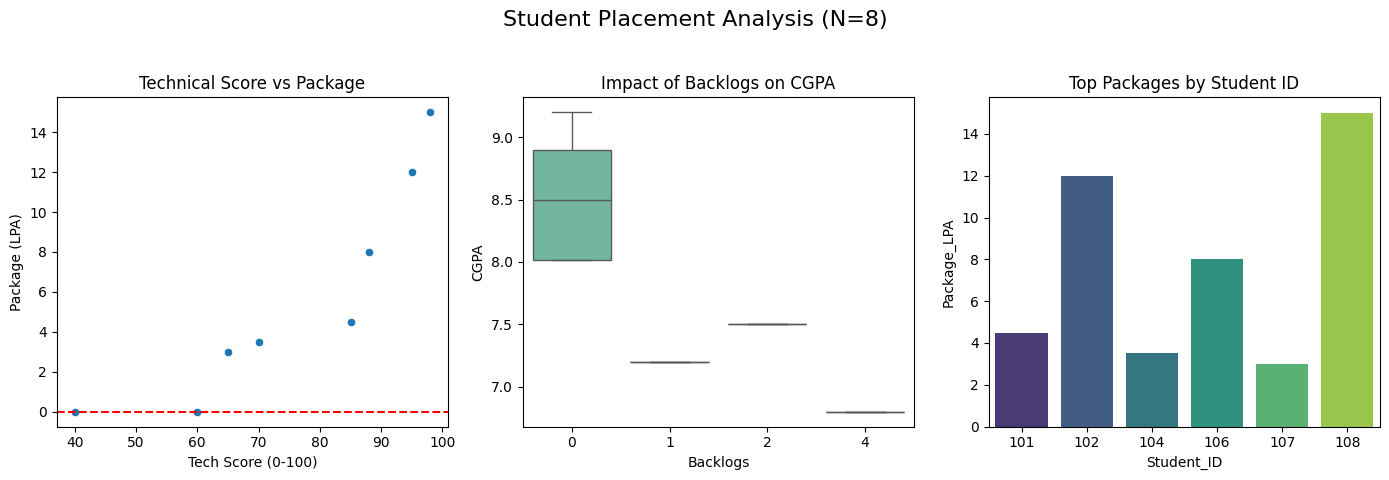

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- SCENARIO ---
# You are the Placement Coordinator. You received a messy Excel file
# from the department clerk. You need to clean it to present a report
# to the Principal about this year's performance.

# --- 1. CREATING THE MESSY DATASET ---
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    # Messy values: 'Unknown', '9.5 (Topper)', 'NaN'
    'CGPA': ['8.5', '9.2', '7.5', 'Unknown', '6.8', '8.9', '7.2', '9.5 (Topper)'],
    # Messy: NaN likely means 0 backlogs
    'Backlogs': [0, 0, 2, 0, 4, np.nan, 1, 0],
    'Technical_Score': [85, 95, 60, 70, 40, 88, 65, 98],
    # Messy: '4.5 LPA', 'Not Placed', '1500000' (Raw Amount)
    'Package_LPA': ['4.5 LPA', '12.0 LPA', 'Not Placed', '3.5 LPA', 'Not Placed', '8.0', '3.0 LPA', '1500000']
}

df = pd.DataFrame(data)

print("--- 1. RAW MESSY DATA ---")
print(df)


# --------------------------------------------------
print("\n\n--- 2. DATA PREPROCESSING (CLEANING) ---")
print("\n\n--- STARTING CLEANUP ---")

# --- A. Clean 'CGPA' column ---
# Problem: 'Unknown', '9.5 (Topper)', turn errors to NaN, then fill.
# Solution: Force convert to numeric, turning text errors to NaN, then fill with Mean.
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')  # 'Unknown' & '9.5 (Topper)' become NaN
mean_cgpa = df['CGPA'].mean()
df['CGPA'] = df['CGPA'].fillna(mean_cgpa)
print(f"Fixed CGPA. Filled missing values with Mean: ({mean_cgpa:.2f})")

# --- B. Clean 'Backlogs' column ---
# Problem: NaN exists.
# Domain logic: If backlog is empty (NaN), it usually means the student has None (0).
df['Backlogs'] = df['Backlogs'].fillna(0)
df['Backlogs'] = df['Backlogs'].astype(int) # Convert to integer type
print("Fixed Backlogs. Assumed NaN means 0 backlogs.")


# --- C. Clean 'Package_LPA' (The tricky part) ---
# Problem: '4.5 LPA', 'Not Placed', '1500000' (Raw Amount)
def clean_package(value):
    """Converts various package formats to a clean float in LPA."""
    value = str(value).lower().strip()

    # 1. Handle 'Not Placed' / 'Unplaced' cases
    if "not placed" in value:
        return 0.0

    # 2. Handle 'LPA' cases (e.g., '4.5 lpa')
    if "lpa" in value:
        # Remove 'lpa' and convert to float
        return float(value.replace('lpa', '').strip())

    # 3. Handle raw numbers (e.g., '8.0' or '1500000')
    try:
        val = float(value)
        # ASSUMPTION: If value > 50, it's in Rupees (raw amount), not Lakhs per Annum.
        # This is based on typical placement package values.
        if val > 50:
            return val / 100000  # Convert Raw Rupees to Lakhs (1 Lakh = 100,000)
        return val # Already in LPA (e.g., 8.0)
    except ValueError:
        # If conversion fails (e.g., some unexpected text), treat as 0.0
        return 0.0

df['Package_LPA'] = df['Package_LPA'].apply(clean_package)
print("Fixed Packages. Standardized everything to Lakhs Per Annum (LPA).")

# Add a categorical column for visualization (e.g., for filtering)
df['Placement_Status'] = df['Package_LPA'].apply(lambda x: 'Placed' if x > 0 else 'Unplaced')

print("\n\n--- 3. FINAL CLEAN DATA ---")
print(df)


# --------------------------------------------------
print("\n\n--- 4. EDA VISUALIZATION ---")

plt.figure(figsize=(14, 5))
plt.suptitle(f"Student Placement Analysis (N={len(df)})", fontsize=16)

# --- Plot 1: Technical Score vs Package ---
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
sns.scatterplot(x='Technical_Score', y='Package_LPA', data=df)
plt.title('Technical Score vs Package')
plt.xlabel('Tech Score (0-100)')
plt.ylabel('Package (LPA)')
# Add a zero line for packages to emphasize unplaced students
plt.axhline(y=0, color='red', linestyle='--')


# --- Plot 2: CGPA vs Backlogs (Do backlogs affect grades?) ---
plt.subplot(1, 3, 2)
# Using a boxplot to show the distribution of CGPA for different backlog counts
sns.boxplot(x='Backlogs', y='CGPA', data=df, palette='Set2')
plt.title('Impact of Backlogs on CGPA')


# --- Plot 3: Who got the highest packages? ---
plt.subplot(1, 3, 3)
# Filter only placed students for this chart
placed_df = df[df['Package_LPA'] > 0]
# Use barplot to show individual student performance
sns.barplot(x='Student_ID', y='Package_LPA', data=placed_df, palette='viridis')
plt.title('Top Packages by Student ID')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for the suptitle
plt.show()